# **BackProjection using histogram technique**

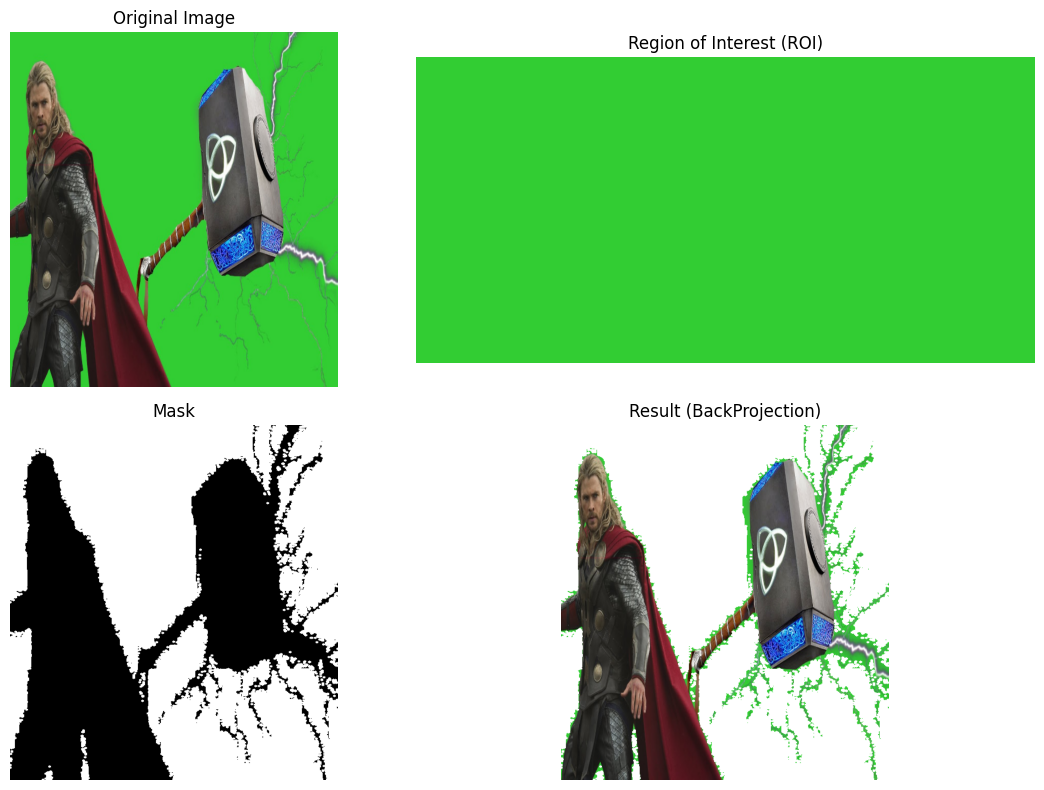

In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images (update paths as necessary)
original_image = cv2.imread("/content/th.jpg")
original_image = cv2.resize(original_image, (600, 650))
hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

roi = cv2.imread("/content/g.png")
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate the histogram for the ROI
roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Calculate the BackProjection of the original image using the ROI histogram
mask = cv2.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)

# Apply filtering to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)

# Apply thresholding to create a binary mask
_, mask = cv2.threshold(mask, 200, 255, cv2.THRESH_BINARY)

# Merge the mask into three channels for bitwise operation with the original image
mask_3channel = cv2.merge((mask, mask, mask))
result = cv2.bitwise_or(original_image, mask_3channel)

# Convert images to RGB for display with matplotlib
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
mask_rgb = cv2.cvtColor(mask_3channel, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(roi_rgb)
plt.title("Region of Interest (ROI)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mask_rgb)
plt.title("Mask")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(result_rgb)
plt.title("Result (BackProjection)")
plt.axis('off')

plt.tight_layout()
plt.show()
